# Unsupervised learning

In [1]:
%cd C:\\Users\\s\\Downloads\\machine_learning\\machine-learning-ex7\\ex7
%pwd

C:\Users\s\Downloads\machine_learning\machine-learning-ex7\ex7


'C:\\Users\\s\\Downloads\\machine_learning\\machine-learning-ex7\\ex7'

## K-means clustering

### Implementing K-means

(300, 2)


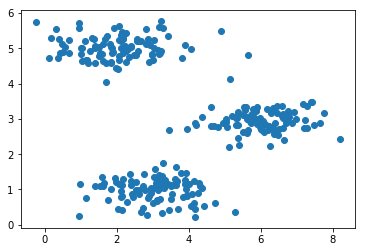

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


data2 = loadmat('ex7data2.mat')
data2
x20 = data2['X']
print(x20.shape)

plt.scatter(x20[:, 0], x20[:, 1])
plt.show()

In [18]:
def find_closest_centroids(x, centroids):
    k = centroids.shape[0]
    m = x.shape[0]
    idx = np.zeros((m, 1))
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((x[i, :] - centroids[j, :]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j+1
                
    return idx

idx20 = find_closest_centroids(x20, np.array([[3, 3], [6, 2], [8, 5]]))
print(idx20[0:3])

[[1.]
 [3.]
 [2.]]


In [20]:
def compute_centroids(x, idx, k):
    centroids = np.zeros((k, x.shape[1]))
    for i in range(k):
        index = np.where(i+1 == idx.ravel())
        centroids[i, :] = np.mean(x[index, :], axis=1)
        
    return centroids

print(compute_centroids(x20, idx20, 3))

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


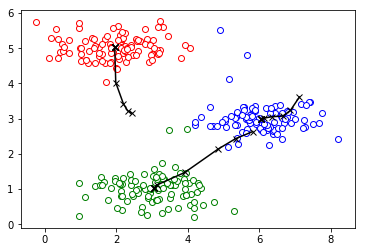

In [31]:
def run_kmeans_plot(x, initial_centroids, max_iters):
    m = x.shape[0]
    k = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros((m, 1))
    cent1 = np.zeros((max_iters, initial_centroids.shape[1]))
    cent2 = np.zeros((max_iters, initial_centroids.shape[1]))
    cent3 = np.zeros((max_iters, initial_centroids.shape[1]))
    
    for i in range(max_iters):
        idx = find_closest_centroids(x, centroids)
        centroids = compute_centroids(x, idx, k)
        cent1[i, :] = centroids[0, :]
        cent2[i, :] = centroids[1, :]
        cent3[i, :] = centroids[2, :]
        
    return idx, centroids, cent1, cent2, cent3

idx21, centroids20, cent10, cent20, cent30 = run_kmeans_plot(x20, np.array([[3, 3], [6, 2], [8, 5]]), 10)

idx21_1 = np.where(idx21.ravel() == 1)
idx21_2 = np.where(idx21.ravel() == 2)
idx21_3 = np.where(idx21.ravel() == 3)

plt.scatter(x20[idx21_1, 0], x20[idx21_1, 1], color='w', marker='o', edgecolors='r')
plt.scatter(x20[idx21_2, 0], x20[idx21_2, 1], color='w', marker='o', edgecolors='g')
plt.scatter(x20[idx21_3, 0], x20[idx21_3, 1], color='w', marker='o', edgecolors='b')

plt.plot(cent10[:, 0], cent10[:, 1], c='k', linestyle='-', marker='x')
plt.plot(cent20[:, 0], cent20[:, 1], c='k', linestyle='-', marker='x')
plt.plot(cent30[:, 0], cent30[:, 1], c='k', linestyle='-', marker='x')
plt.show()

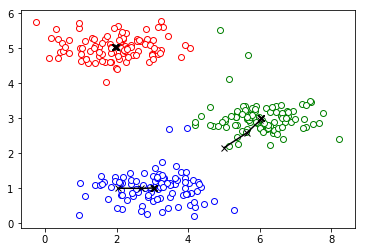

In [55]:
def rand_centroids(x, k):
    m, n = x.shape
    rand_idx = np.random.choice(m, k)
    centroids = x[rand_idx]
    
    return centroids

rand_centroids0 = rand_centroids(x20, 3)
idx22, centroids21, cent11, cent21, cent31 = run_kmeans_plot(x20, rand_centroids0, 10)

idx22_1 = np.where(idx22.ravel() == 1)
idx22_2 = np.where(idx22.ravel() == 2)
idx22_3 = np.where(idx22.ravel() == 3)

plt.scatter(x20[idx22_1, 0], x20[idx22_1, 1], color='w', marker='o', edgecolors='r')
plt.scatter(x20[idx22_2, 0], x20[idx22_2, 1], color='w', marker='o', edgecolors='g')
plt.scatter(x20[idx22_3, 0], x20[idx22_3, 1], color='w', marker='o', edgecolors='b')

plt.plot(cent11[:, 0], cent11[:, 1], c='k', linestyle='-', marker='x')
plt.plot(cent21[:, 0], cent21[:, 1], c='k', linestyle='-', marker='x')
plt.plot(cent31[:, 0], cent31[:, 1], c='k', linestyle='-', marker='x')
plt.show()

## Principal Component Analysis

(50, 2)


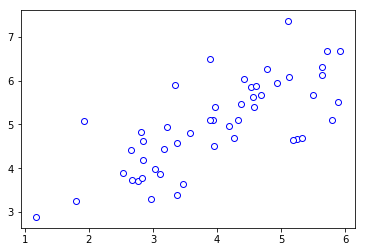

In [58]:
data1 = loadmat('ex7data1.mat')
data1
x10 = data1['X']
print(x10.shape)

plt.scatter(x10[:, 0], x10[:, 1], color='w', edgecolors='b', marker='o')
plt.show()

In [62]:
def feature_normalization(x):
    mu = np.mean(x, axis=0)
    x_norm = x - mu
    sigma = np.std(x_norm, axis=0)
    x_norm = x_norm / sigma
    
    return x_norm, mu, sigma

def pca(x_norm):
    m = x_norm.shape[0]
    sigma = 1 / m * x_norm.T.dot(x_norm)
    U, S, V = np.linalg.svd(sigma)
    
    return U, S, V

x10_norm, mu10, sigma10 = feature_normalization(x10)
u0, s0, v0 = pca(x10_norm)
print(u0[0, 0], u0[1, 0])

-0.7071067811865472 -0.7071067811865476


In [67]:
def project_data(x, U, k):
    u_reduce = U[:, 0:k]
    z = x.dot(u_reduce)
    
    return z

z0 = project_data(x10_norm, u0, 1)
print(z0[0])

[1.49631261]


[-1.05805279 -1.05805279]


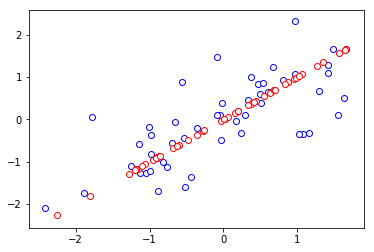

In [71]:
def recover_data(z, U, k):
    u_reduce = U[:, :k]
    x_rec = z.dot(u_reduce.T)
    
    return x_rec

x10_rec = recover_data(z0, u0, 1)
print(x10_rec[0, :])

plt.scatter(x10_norm[:, 0], x10_norm[:, 1], color='w', edgecolors='b', marker='o')
plt.scatter(x10_rec[:, 0], x10_rec[:, 1], color='w', edgecolors='r', marker='o')
plt.show()
